In [16]:
import numpy as np
import pandas as pd

from subprocess import check_output

In [17]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from sklearn import datasets, svm, metrics

In [19]:
# digits dataset
digits = datasets.load_digits()
print('Digits dataset keys \n{}'.format(digits.keys()))

Digits dataset keys 
dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])


In [20]:
print('dataset target name: \n{}'.format(digits.target_names))
print('shape of datset: {} \nand target: {}'.format(digits.data.shape, digits.target.shape))
print('shape of the images: {}'.format(digits.images.shape))

dataset target name: 
[0 1 2 3 4 5 6 7 8 9]
shape of datset: (1797, 64) 
and target: (1797,)
shape of the images: (1797, 8, 8)


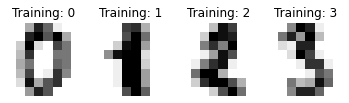

In [21]:
#plot the data, which is just the images flattened into a 1-d array
for i in range(0,4):
    plt.subplot(2, 4,i + 1)
    plt.axis('off')
    imside = int(np.sqrt(digits.data[i].shape[0]))
    im1 = np.reshape(digits.data[i],(imside,imside))
    plt.imshow(im1, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: {}'.format(digits.target[i]))
plt.show()

In [22]:
#First we flatten the images
n_samples = len(digits.images)
data_images = digits.images.reshape((n_samples, -1))

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_images,digits.target, test_size=0.3)
print('Training data and target sizes: \n{}, {}'.format(X_train.shape,y_train.shape))
print('Test data and target sizes: \n{}, {}'.format(X_test.shape,y_test.shape))

Training data and target sizes: 
(1257, 64), (1257,)
Test data and target sizes: 
(540, 64), (540,)


In [33]:
classifier = svm.SVC(gamma=0.001, kernel='linear')
classifier.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [34]:
# now to Now predict the value of the digit on the test data
y_pred = classifier.predict(X_test)

In [35]:
print("Accuracy = ", metrics.accuracy_score(y_test, y_pred))

Accuracy =  0.9777777777777777


In [36]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y_test, y_pred)))

Classification report for classifier SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.93      0.98      0.96        57
           2       1.00      1.00      1.00        48
           3       1.00      0.95      0.98        64
           4       1.00      1.00      1.00        60
           5       0.98      0.98      0.98        54
           6       1.00      0.98      0.99        58
           7       0.98      0.98      0.98        57
           8       0.95      0.90      0.93        42
           9       0.92      0.98      0.95        50

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighte

In [38]:
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, y_pred))

Confusion matrix:
[[50  0  0  0  0  0  0  0  0  0]
 [ 0 56  0  0  0  0  0  0  0  1]
 [ 0  0 48  0  0  0  0  0  0  0]
 [ 0  0  0 61  0  0  0  0  2  1]
 [ 0  0  0  0 60  0  0  0  0  0]
 [ 0  0  0  0  0 53  0  0  0  1]
 [ 0  1  0  0  0  0 57  0  0  0]
 [ 0  0  0  0  0  1  0 56  0  0]
 [ 0  3  0  0  0  0  0  0 38  1]
 [ 0  0  0  0  0  0  0  1  0 49]]
